In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading dataset
df = pd.read_csv('S&P BSE SENSEX.csv',parse_dates=['Date'], dayfirst=True)
df.head()

,Date,Close
0,2015-01-01,27507.54
1,2015-01-02,27887.90
2,2015-01-03,27887.90
3,2015-01-04,27887.90
4,2015-01-05,27842.32


In [3]:
#converting date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Close
0,2015-01-01,27507.54
1,2015-01-02,27887.90
2,2015-01-03,27887.90
3,2015-01-04,27887.90
4,2015-01-05,27842.32


In [4]:
df.set_index('Date',inplace=True)
df.head()

,Close
Date,
2015-01-01,27507.54
2015-01-02,27887.90
2015-01-03,27887.90
2015-01-04,27887.90
2015-01-05,27842.32


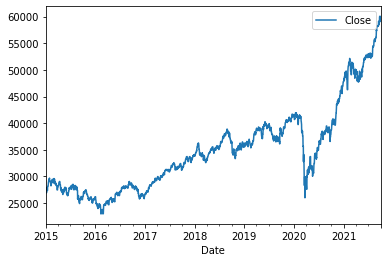

In [5]:
df.plot()
#---data is not stationry as seen from plot: increasing mean

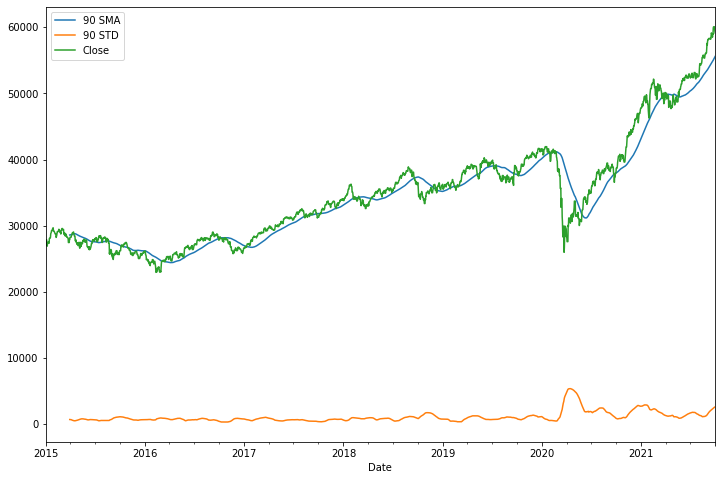

In [6]:
#visualising mean and standard deviation of data
df['Close'].rolling(90).mean().plot(label='90 SMA',figsize=(12,8))
df['Close'].rolling(90).std().plot(label='90 STD')
df['Close'].plot()
plt.legend()
#---standard deviation constant, mean increasing so not stationary

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

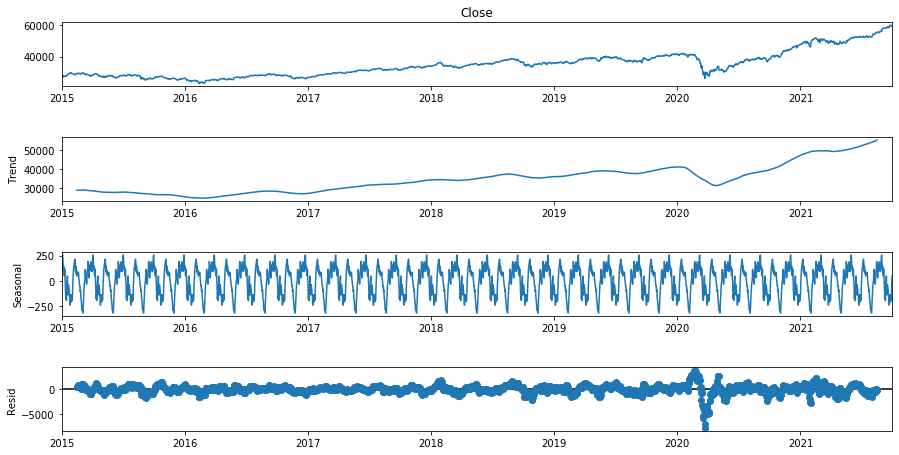

In [8]:
#decomposing 'Close' value into trend,seasonal,residuals
decomp = seasonal_decompose(df['Close'],period=90)
fig = decomp.plot()
fig.set_size_inches(14,7)
#----trend increasing,seasonality exists,residuals aka noise exists

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
#performing statistical dickeyfuller test
fuller_test = adfuller(df['Close'])
fuller_test

(0.9533684157606539,
 0.9937487314901248,
 25,
 2439,
 {'1%': -3.4330339670691994,
  '5%': -2.8627257493596634,
  '10%': -2.5674012225098473},
 34907.22499265983)

In [11]:
def test_p_value(data):
        fuller_test = adfuller(data)
        print('P-value: ',fuller_test[1])
        if fuller_test[1] <= 0.05:
            print('Data is stationary')
        else:
            print('Data is not stationary')

In [12]:
test_p_value(df['Close'])

P-value:  0.9937487314901248
Data is not stationary


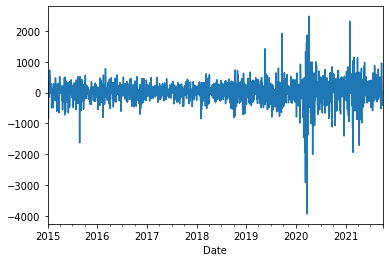

In [13]:
#---since p value>0.05 performing differencing to make data stationary
df['First_diff'] = df['Close'] - df['Close'].shift(1)
df['First_diff'].plot()

In [14]:
test_p_value(df['First_diff'].dropna())

P-value:  5.678678729245567e-16
Data is stationary


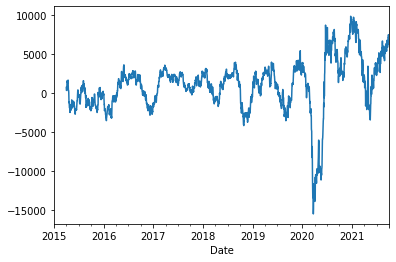

In [15]:
#perfoming differencing with a 90 days period
df['Seasonal_diff'] = df['Close'] - df['Close'].shift(90)
df['Seasonal_diff'].plot()

In [16]:
test_p_value(df['Seasonal_diff'].dropna())

P-value:  0.0015644129052056473
Data is stationary


In [17]:
#plotting acf and pacf plots on differenced non stationary data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

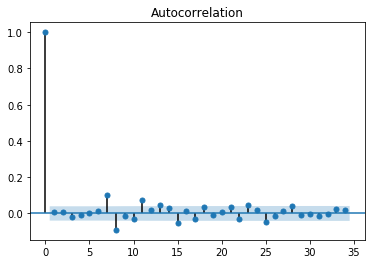

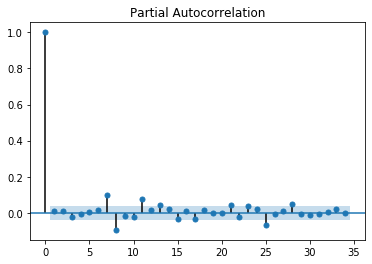

In [18]:
first_diff = plot_acf(df['First_diff'].dropna())
first_diff_pacf= plot_pacf(df['First_diff'].dropna())

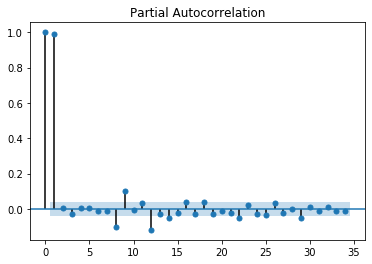

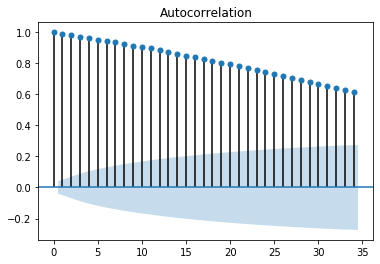

In [19]:
p1= plot_pacf(df['Seasonal_diff'].dropna())
p2 = plot_acf(df['Seasonal_diff'].dropna())

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
#training using SARIMAX model as seasonality component present: if no seasonality then directly use ARIMA
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(0,1,0,90))
results = model.fit()
#---order, seasonal order obtained using auto_arima class of pmdarima library.It gives optimal value for order based on 
#first_difference and seasonal_differnce respectively

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [22]:
#actual-predicted values
results.resid

Date
2015-01-01    27507.54
2015-01-02      380.36
2015-01-03        0.00
2015-01-04        0.00
2015-01-05      -45.58
                ...   
2021-09-26      189.45
2021-09-27      215.34
2021-09-28     -343.33
2021-09-29      -90.22
2021-09-30     -452.98
Length: 2465, dtype: float64

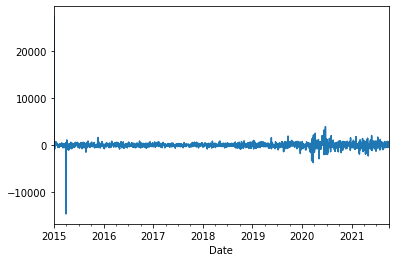

In [23]:
results.resid.plot()

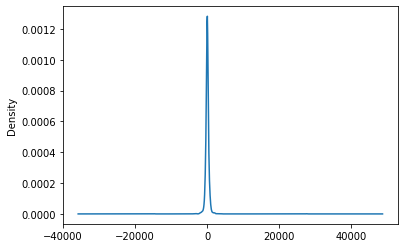

In [24]:
#kernal density estimation plot
results.resid.plot(kind='kde
#--density is more around 0, prediction accuracy is good

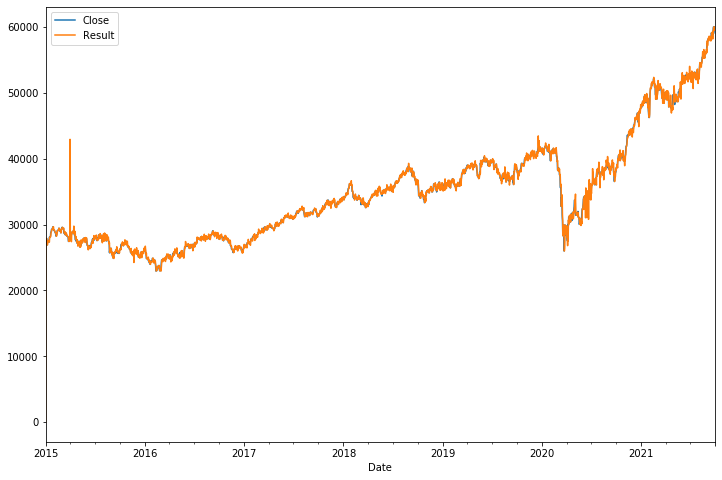

In [25]:
df['Result'] = results.predict()
df[['Close','Result']].plot(figsize=(12,8))

In [26]:
#adding 3 months of extra dates for prediction
from pandas.tseries.offsets import DateOffset
extra_dates = [df.index[-1] + DateOffset(days=m) for m in range (1,120)]

In [27]:
extra_dates


[Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-02 00:00:00'),
 Timestamp('2021-10-03 00:00:00'),
 Timestamp('2021-10-04 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-08 00:00:00'),
 Timestamp('2021-10-09 00:00:00'),
 Timestamp('2021-10-10 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-12 00:00:00'),
 Timestamp('2021-10-13 00:00:00'),
 Timestamp('2021-10-14 00:00:00'),
 Timestamp('2021-10-15 00:00:00'),
 Timestamp('2021-10-16 00:00:00'),
 Timestamp('2021-10-17 00:00:00'),
 Timestamp('2021-10-18 00:00:00'),
 Timestamp('2021-10-19 00:00:00'),
 Timestamp('2021-10-20 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-22 00:00:00'),
 Timestamp('2021-10-23 00:00:00'),
 Timestamp('2021-10-24 00:00:00'),
 Timestamp('2021-10-25 00:00:00'),
 Timestamp('2021-10-26 00:00:00'),
 Timestamp('2021-10-27 00:00:00'),
 Timestamp('2021-10-28 00:00:00'),
 Timestamp('2021-10-

In [28]:
forecast_df = pd.DataFrame(index=extra_dates,columns=df.columns)
forecast_df.head()

,Close,First_diff,Seasonal_diff,Result
2021-10-01,NaN,NaN,NaN,NaN
2021-10-02,NaN,NaN,NaN,NaN
2021-10-03,NaN,NaN,NaN,NaN
2021-10-04,NaN,NaN,NaN,NaN
2021-10-05,NaN,NaN,NaN,NaN


In [29]:
predict=results.predict(start=len(df),end=len(df)+118)
predict

2021-10-01    59126.36
2021-10-02    59126.36
2021-10-03    59521.69
2021-10-04    59502.87
2021-10-05    59696.45
                ...   
2022-01-23    65862.14
2022-01-24    65727.09
2022-01-25    65936.45
2022-01-26    65870.22
2022-01-27    65870.22
Freq: D, Name: predicted_mean, Length: 119, dtype: float64

In [30]:
pred=pd.Series(predict)

In [31]:
forecast_df=forecast_df.assign(Result=pred.values)

In [32]:
forecast_df

,Close,First_diff,Seasonal_diff,Result
2021-10-01,NaN,NaN,NaN,59126.36
2021-10-02,NaN,NaN,NaN,59126.36
2021-10-03,NaN,NaN,NaN,59521.69
2021-10-04,NaN,NaN,NaN,59502.87
2021-10-05,NaN,NaN,NaN,59696.45
...,...,...,...,...
2022-01-23,NaN,NaN,NaN,65862.14
2022-01-24,NaN,NaN,NaN,65727.09
2022-01-25,NaN,NaN,NaN,65936.45
2022-01-26,NaN,NaN,NaN,65870.22


In [33]:
df

,Close,First_diff,Seasonal_diff,Result
Date,,,,
2015-01-01,27507.54,NaN,NaN,0.00
2015-01-02,27887.90,380.36,NaN,27507.54
2015-01-03,27887.90,0.00,NaN,27887.90
2015-01-04,27887.90,0.00,NaN,27887.90
2015-01-05,27842.32,-45.58,NaN,27887.90
...,...,...,...,...
2021-09-26,60048.47,0.00,7312.88,59859.02
2021-09-27,60077.88,29.41,7528.22,59862.54
2021-09-28,59667.60,-410.28,7184.89,60010.93


In [34]:
final_df=pd.concat([df,forecast_df])
final_df.drop(['First_diff','Seasonal_diff'],axis=1,inplace=True)
final_df

,Close,Result
2015-01-01,27507.54,0.00
2015-01-02,27887.90,27507.54
2015-01-03,27887.90,27887.90
2015-01-04,27887.90,27887.90
2015-01-05,27842.32,27887.90
...,...,...
2022-01-23,NaN,65862.14
2022-01-24,NaN,65727.09
2022-01-25,NaN,65936.45
2022-01-26,NaN,65870.22


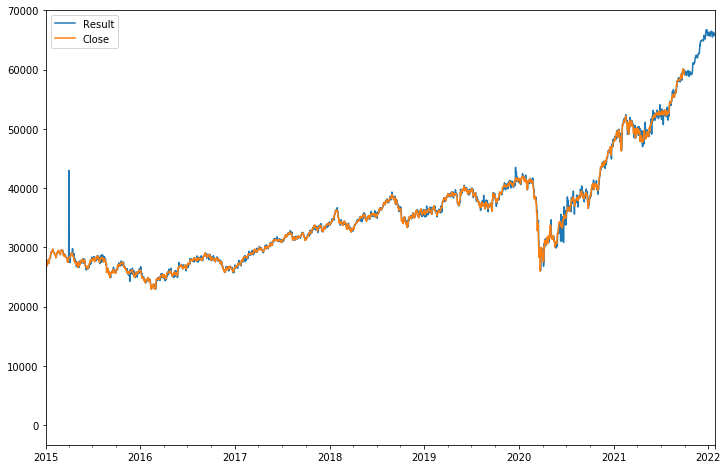

In [35]:
#test data and trainnig data predicted values in blue
final_df[['Result','Close']].plot(figsize=(12,8))